In [1]:
# QUESTION #1

# Load the file and attach
setwd("/Users/il239838/Downloads/private/VIZ")
cars <- read.csv(file="cars.csv",head=TRUE,sep=",")
attach (cars)

# Adjust the weight for missing items and calc them according to mean of others
L = (Weight == '*')
cars2 = cars [!L,]
cars2$Weight = as.integer(as.character(cars2$Weight))
cars [["Weight"]] = as.integer(as.character(cars[["Weight"]]))
cars [L,"Weight"] = mean (cars2$Weight)
# print(cars[["Weight"]])

# Print the mean and std
print(mean(cars[["Weight"]]))
print(sd(cars[["Weight"]]))


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

[1] 3577.214
[1] 758.6547


In [2]:
# QUESTION #2

# Create a new column for the type
cars["Type"] = "Regular"
cars[cars[2]==1, "Type"] = "Sports Car"
cars[cars[3]==1, "Type"] = "SUV"
cars[cars[4]==1, "Type"] = "Wagon"
cars[cars[5]==1, "Type"] = "Minivan"
cars[cars[6]==1, "Type"] = "Pickup"
detach(cars)
attach(cars)

# Fix the missing values for City.MPG
L = (City.MPG == '*')
cars2 = cars [!L,]
cars2$City.MPG = as.integer(as.character(cars2$City.MPG))
cars [["City.MPG"]] = as.integer(as.character(cars[["City.MPG"]]))
cars [L,"City.MPG"] = mean (cars2$City.MPG)

# Fix the missing values for Hwy.MPG
L = (Hwy.MPG == '*')
cars2 = cars [!L,]
cars2$Hwy.MPG = as.integer(as.character(cars2$Hwy.MPG))
cars [["Hwy.MPG"]] = as.integer(as.character(cars[["Hwy.MPG"]]))
cars [L,"Hwy.MPG"] = mean (cars2$Hwy.MPG)

# Fix the missing values for Wheel.Base
L = (Wheel.Base == '*')
cars2 = cars [!L,]
cars2$Wheel.Base = as.integer(as.character(cars2$Wheel.Base))
cars [["Wheel.Base"]] = as.integer(as.character(cars[["Wheel.Base"]]))
cars [L,"Wheel.Base"] = mean (cars2$Wheel.Base)

# Fix the missing values for Weight
L = (Weight == '*')
cars2 = cars [!L,]
cars2$Weight = as.integer(as.character(cars2$Weight))
cars [["Weight"]] = as.integer(as.character(cars[["Weight"]]))
cars [L,"Weight"] = mean (cars2$Weight)

# Aggregate
Grouped = aggregate (cars[c(9,10,11,12,13,14,15,16,17)], by = list (Type), FUN = mean)
write.table (Grouped, "Grouped.csv", sep=",")
Grouped

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

Group.1,Retail.Price,Dealer.Cost,Engine.Size..l.,Cyl,HP,City.MPG,Hwy.MPG,Weight,Wheel.Base
Minivan,27796.50,25355.50,3.535000,5.900000,204.4500,17.90000,24.45000,4193.600,117.40000
Pickup,24941.38,22616.75,4.079167,6.250000,224.8333,16.83706,21.41274,4250.750,123.00000
Regular,29814.36,27446.14,2.908571,5.530612,200.0857,21.70532,29.27817,3321.788,107.18509
SUV,34790.25,31625.35,3.920000,6.566667,235.8167,16.26816,20.73176,4444.433,111.08333
Sports Car,53387.06,48473.16,3.442857,6.040816,284.1633,18.65671,25.77167,3295.694,99.97959
Wagon,28840.53,26645.63,2.770000,5.300000,194.0000,20.93631,27.76353,3438.800,105.80000


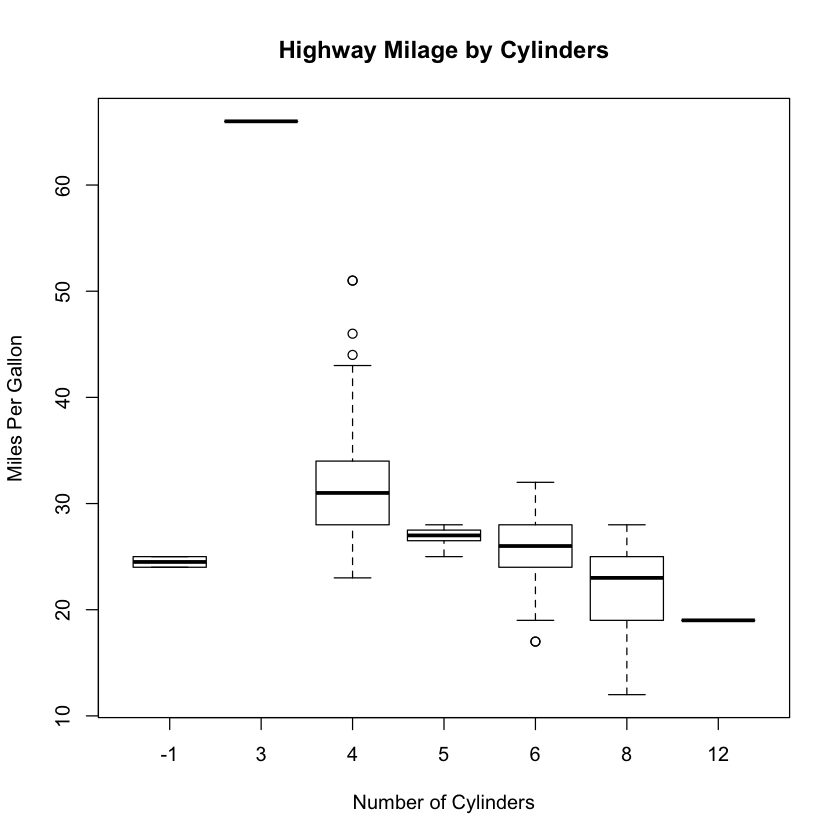

In [3]:
# Question #3

# Handle the fields (missing, factor..)
L = (Hwy.MPG == '*')
cars2 = cars [!L,]
cars2$Hwy.MPG = as.integer(as.character(cars2$Hwy.MPG))
cars2$Cyl = as.integer(as.character(cars2$Cyl))

# draw the boxplot as an aggregate by cylinder
boxplot(Hwy.MPG~Cyl,data=cars2, main="Highway Milage by Cylinders", 
  	xlab="Number of Cylinders", ylab="Miles Per Gallon")

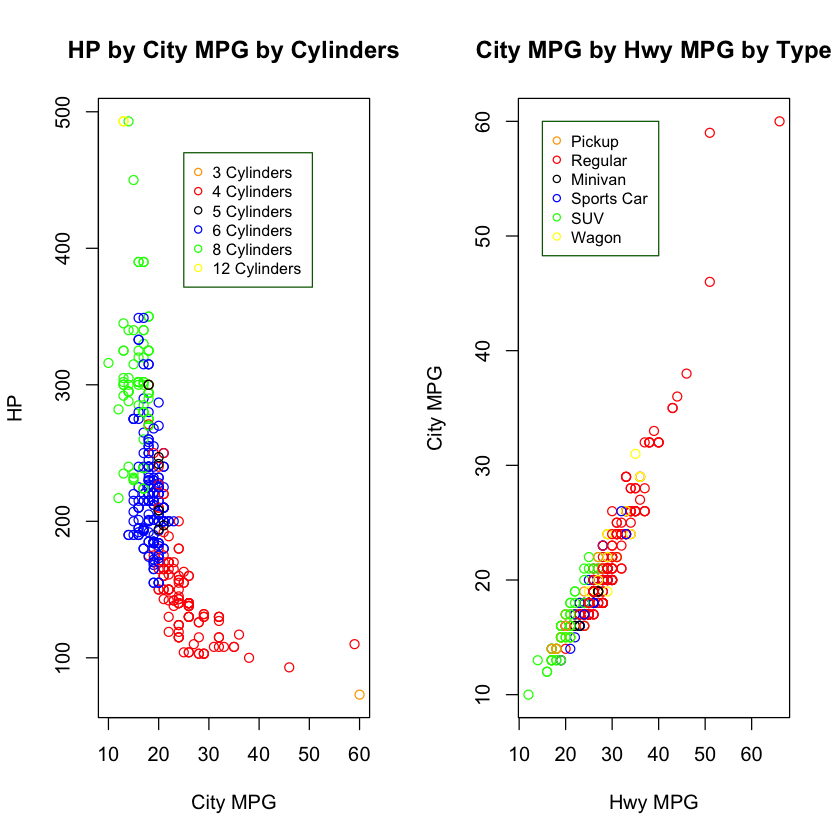

In [4]:
# Question #4

# Continue to handle the fields (missing, factor..)
L = (City.MPG == '*')
cars3 = cars2 [!L,]
cars3$City.MPG = as.integer(as.character(cars3$City.MPG))
cars3$color[cars3$Cyl==4] <- "red"
cars3$color[cars3$Cyl==6] <- "blue"
cars3$color[cars3$Cyl==8] <- "green"
cars3$color[cars3$Cyl==12] <- "yellow"
cars3$color[cars3$Cyl==5] <- "black"
cars3$color[cars3$Cyl==3] <- "orange"

par(mfrow=c(1,2))

plot (cars3$City.MPG,cars3$HP,cex = 1, col = cars3$color, main="HP by City MPG by Cylinders", 
  	ylab="HP", xlab="City MPG")
legend(25, 470, pch=c(1,1), col=c("orange", "red", "black", "blue", "green", "yellow"), c("3 Cylinders", "4 Cylinders", "5 Cylinders", "6 Cylinders", "8 Cylinders", "12 Cylinders"),  box.col="darkgreen", cex=.8)

cars3$color[cars3$Type=="Regular"] <- "red"
cars3$color[cars3$Type=="Sports Car"] <- "blue"
cars3$color[cars3$Type=="SUV"] <- "green"
cars3$color[cars3$Type=="Wagon"] <- "yellow"
cars3$color[cars3$Type=="Minivan"] <- "black"
cars3$color[cars3$Type=="Pickup"] <- "orange"

plot (cars3$Hwy.MPG,cars3$City.MPG,cex = 1, col = cars3$color, main="City MPG by Hwy MPG by Type", 
  	ylab="City MPG", xlab="Hwy MPG")
legend(15, 60, pch=c(1,1), col=c("orange", "red", "black", "blue", "green", "yellow"), c("Pickup", "Regular", "Minivan", "Sports Car", "SUV", "Wagon"),  box.col="darkgreen", cex=.8)


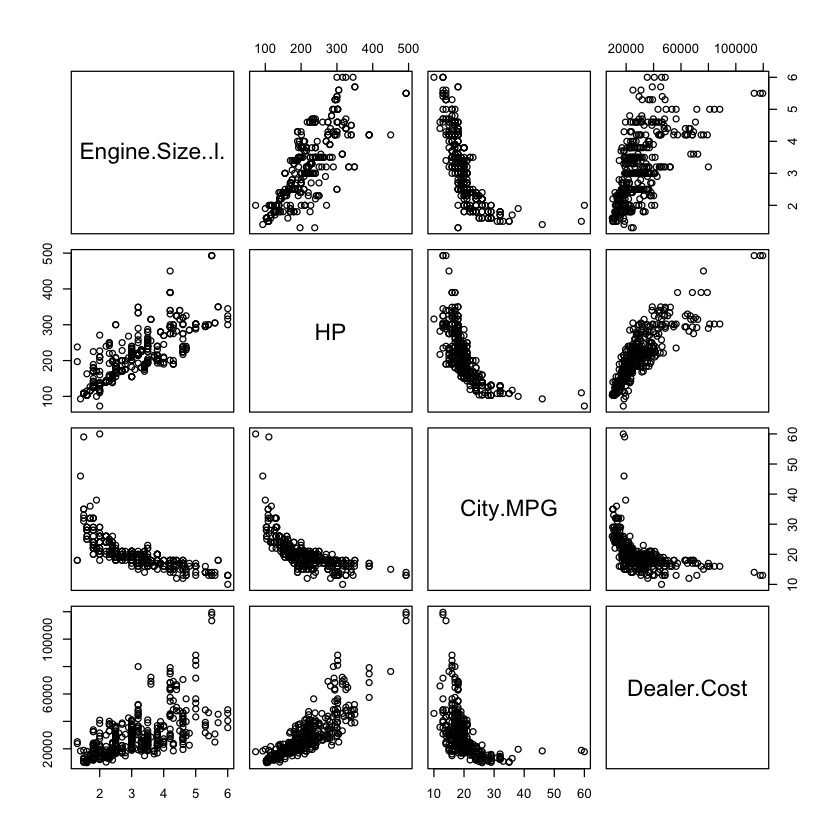

In [5]:
# Question #5
cars4 = cars3[,c(11,13,14,10)]
plot(cars4)